# Import required python modules

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import random

# Generate our "jellybeans"

Generate a random distribution of 200 colors, defined by RGB sequence

In [94]:
rgb_colors = np.array([(np.random.randint(256, size=3)) for x in range(200)])/255.

Let's plot our jellybean data

Text(0.5, 0, 'B')

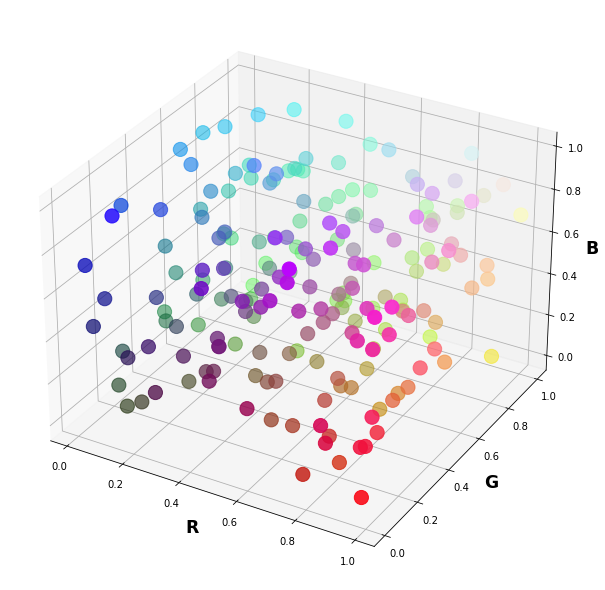

In [95]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
ax.scatter(rgb_colors[:, 0], rgb_colors[:, 1], rgb_colors[:, 2], c=rgb_colors,s=200)
ax.set_xlabel('R',weight='bold',fontsize='xx-large')
ax.set_ylabel('G',weight='bold',fontsize='xx-large')
ax.set_zlabel('B',weight='bold',fontsize='xx-large')

# K-means Clustering

In [96]:
num_clusters = 6
kmeans  = KMeans(init='k-means++',n_clusters=num_clusters,random_state=0,verbose=False,algorithm='full')
fit_clusters = kmeans.fit(rgb_colors) #cluster the RGB color data
labels = kmeans.labels_+1 #cluster label for data (add one so first cluster is 1 not 0)
cluster_centers = fit_clusters.cluster_centers_ #centroids for the cluster
cluster_number = np.arange(8).astype(int)
sum_squares = fit_clusters.inertia_ #sum of squares

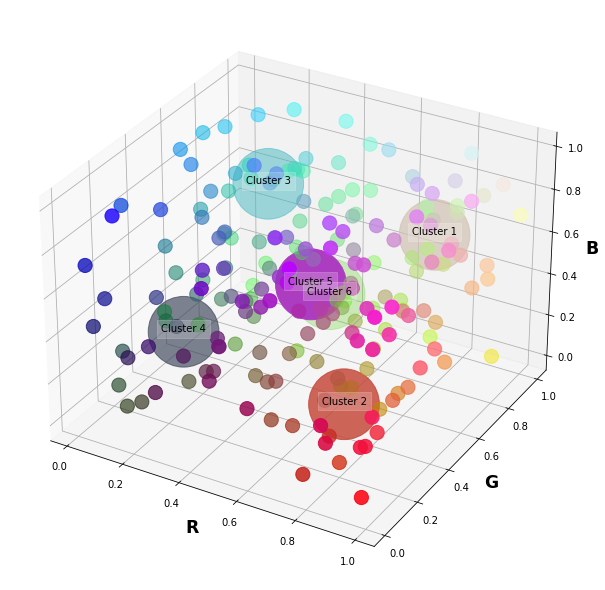

In [97]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
ax.scatter(rgb_colors[:, 0], rgb_colors[:, 1], rgb_colors[:, 2], c=rgb_colors,s=200)
ax.set_xlabel('R',weight='bold',fontsize='xx-large')
ax.set_ylabel('G',weight='bold',fontsize='xx-large')
ax.set_zlabel('B',weight='bold',fontsize='xx-large')
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],c=cluster_centers,s=5000)
cluster_names = ['Cluster {}'.format(n) for n in np.unique(labels)]
cluster_labels = np.sort(np.unique(labels))

for irx,(name, label) in enumerate(zip(cluster_names,cluster_labels)):
    ax.text3D(cluster_centers[irx, 0],
              cluster_centers[irx, 1],
              cluster_centers[irx, 2], name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'),
              zorder=100)

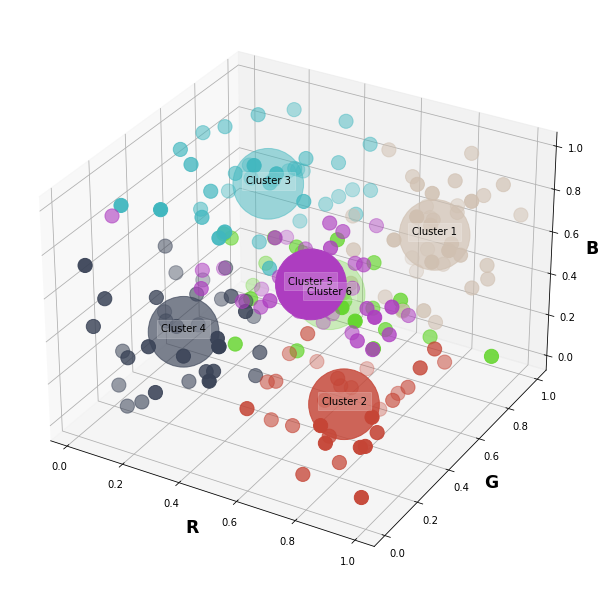

In [98]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
for icx,clabel in enumerate(cluster_labels):
    where = np.where(labels==clabel)[0]
    ax.scatter(rgb_colors[where, 0], rgb_colors[where, 1], rgb_colors[where, 2], c=[cluster_centers[icx, :]],s=200)
ax.set_xlabel('R',weight='bold',fontsize='xx-large')
ax.set_ylabel('G',weight='bold',fontsize='xx-large')
ax.set_zlabel('B',weight='bold',fontsize='xx-large')
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],c=cluster_centers,s=5000)
for irx,(name, label) in enumerate(zip(cluster_names,cluster_labels)):
    ax.text3D(cluster_centers[irx, 0],
              cluster_centers[irx, 1],
              cluster_centers[irx, 2], name,
              horizontalalignment='center',
              bbox=dict(alpha=.2,edgecolor='w', facecolor='w'),
              zorder=100)

# Elbow method

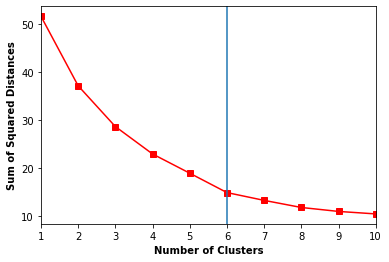

In [99]:
test_clusters = np.arange(1,11,1)
sumsquares = []
#loop through a range of specified k clusters
for tc in test_clusters:
    kmeans2  = KMeans(init='k-means++',n_clusters=tc,random_state=0,verbose=False,algorithm='full')
    fit_clusters2 = kmeans2.fit(rgb_colors)#cluster the RGB color data
    ss = fit_clusters2.inertia_
    #append the sum of squares to sumsquares list
    sumsquares.append(ss)
plt.plot(test_clusters,sumsquares,color='r',marker='s')
plt.xlim(1,test_clusters[-1])
plt.xlabel('Number of Clusters',weight='bold')
plt.ylabel('Sum of Squared Distances',weight='bold')
plt.axvline(x=6)

# Self-Organizing Map (SOM)

Here we'll use the Somoclu package to demonstrate how a SOM can be used for this problem

In [100]:
import somoclu

In [101]:
n_columns = 3
n_rows= 2
totalnodes = int(n_columns*n_rows)
nodes = np.arange(1,totalnodes+1,1).reshape((n_rows,n_columns))
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som.train((rgb_colors).astype(np.float32))
bmu = som.get_bmus(som.get_surface_state())
umatrix = np.array(som.umatrix)
som_weights = som.codebook

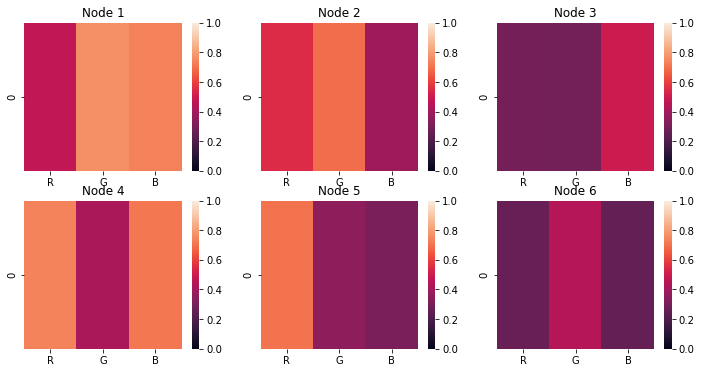

In [102]:
fig,ax = plt.subplots(nrows=n_rows,ncols=n_columns,figsize=(n_columns*4,n_rows*3))
for (r,c),node in np.ndenumerate(nodes):
    where = np.where((bmu[:,0]==c)&(bmu[:,1]==r))[0]
    sns.heatmap(som_weights[r,c,:].reshape((1,-1)),ax=ax[r,c],xticklabels=['R','G','B'],vmin=0,vmax=1)
    ax[r,c].set_title('Node {}'.format(node))

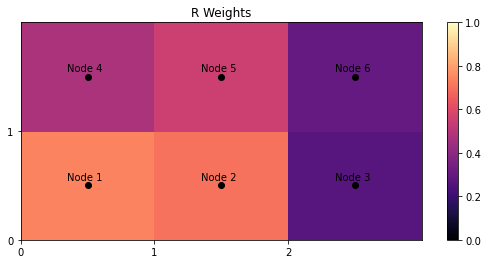

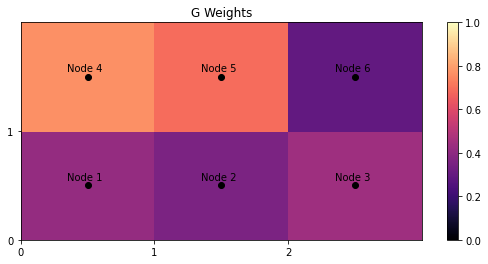

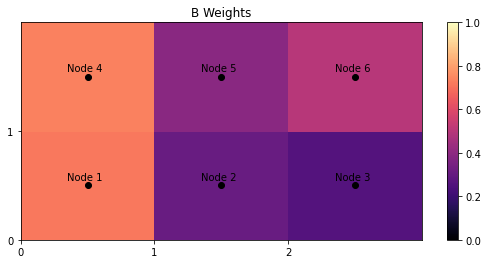

In [103]:
color_list = ['R','G','B']
for irx in range(len(color_list)):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(n_columns*3,n_rows*2))
    #rgb_weight = plt.imshow(np.flipud(som_weights[:,:,irx]),vmin=0,vmax=1,interpolation='bicubic',cmap=plt.get_cmap('magma'))#,levels=np.arange(0,1.1,0.1))
    rgb_weight = plt.pcolormesh(np.flipud(som_weights[:,:,irx]),vmin=0,vmax=1,cmap=plt.get_cmap('magma'))
    plt.colorbar(rgb_weight)
    ax.set_xticks(np.arange(n_columns))
    ax.set_xticklabels(np.arange(n_columns))
    ax.set_yticks(np.arange(n_rows))
    ax.set_yticklabels(np.arange(n_rows))
    plt.title('{} Weights'.format(color_list[irx]))
    xx,yy = np.meshgrid(np.arange(n_columns),np.arange(n_rows))
    ax.scatter(xx+0.5,yy+0.5,marker='o',color='k')
    for (r,c),node in np.ndenumerate(nodes):
        ax.annotate('Node {}'.format(node),xy=(c+0.35,r+0.55))
#som.view_component_planes()   

Text(0.5, 0, 'B')

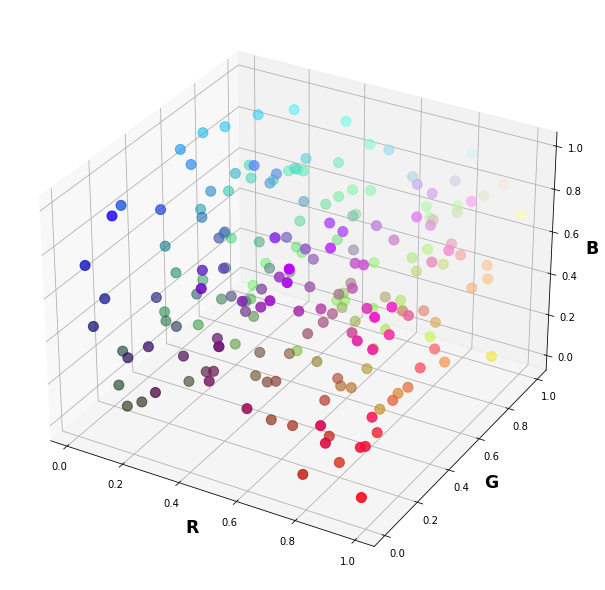

In [104]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
ax.scatter(rgb_colors[:, 0], rgb_colors[:, 1], rgb_colors[:, 2], c=rgb_colors,s=100)
ax.set_xlabel('R',weight='bold',fontsize='xx-large')
ax.set_ylabel('G',weight='bold',fontsize='xx-large')
ax.set_zlabel('B',weight='bold',fontsize='xx-large')

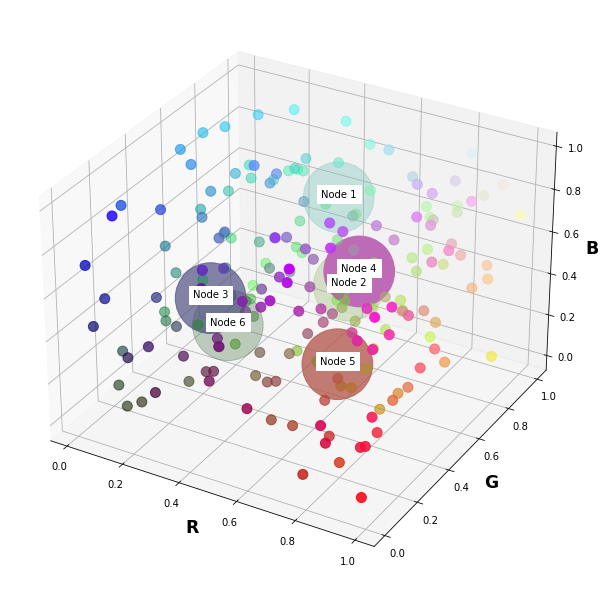

In [105]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
ax.scatter(rgb_colors[:, 0], rgb_colors[:, 1], rgb_colors[:, 2], c=rgb_colors,s=100)
ax.set_xlabel('R',weight='bold',fontsize='xx-large')
ax.set_ylabel('G',weight='bold',fontsize='xx-large')
ax.set_zlabel('B',weight='bold',fontsize='xx-large')
ax.scatter(som_weights[:,:,0],som_weights[:,:,1],som_weights[:,:,2],c=som_weights.reshape(-1,3),s=5000)
node_names = ['Node {}'.format(n) for n in nodes.ravel()]
som_weights2 = som_weights.reshape((-1,3))
for irx,(name, label) in enumerate(zip(node_names,nodes.ravel())):
    ax.text3D(som_weights2[irx, 0],
              som_weights2[irx, 1],
              som_weights2[irx, 2], name,
              horizontalalignment='center',
              bbox=dict(edgecolor='w', facecolor='w'),
              zorder=100)